# Observing Statistics

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

In [3]:
#These are just written on the wiki
pre_jan = {'Ann Elliot': 13,
          'Aaron Meisner': 4,
          'James Lasker': 5,
          'Michael Schubnell': 17,
          'Martin Landriau': 7.5,
          'Satya Gontcho A Gontcho': 6.5,
           'Claire Poppett':10,
          'Luke Tyas': 5,
          'Elizabeth Buckley-Geer': 1.5,
          'Arjun Dey': 0.5,
          'Connie Rockosi': 0.5,
          'Segev BenZvi': 0.5}

In [4]:
LO_names = ['Ann Elliott','Satya Gontcho A Gontcho','Martin Landriau','James Lasker','Michael Schubnell','Claire Poppett',
           'Liz Buckley-Geer','Luke Tyas']

In [5]:
#Emails and institutions
trac = pd.read_csv('TracActivity.csv')
institutions = pd.read_csv('inst.csv')
#print(trac)

In [6]:
def get_names(df,cols):
    all_names=[list(df[col]) for col in cols]
    all_names = np.unique(np.hstack(all_names))
    return all_names

In [7]:
def split_names(df):
    split_names = [name.split(' ') for name in list(df.name)]
    df['last_name'] = [n[-1] for n in split_names]
    df['first_name'] = [' '.join(n[0:-1]) for n in split_names]

    print_name = []
    for idx, row in df.iterrows():
        print_name.append(', '.join([row['last_name'], row['first_name']]))
    df['print_name'] = print_name
    df.sort_values('print_name',inplace=True)
    return df

In [8]:
def split_lo(df):
    df = split_names(df)
    LO = df[df.name.isin(LO_names)]
    NON_LO = df[~df.name.isin(LO_names)]
    return LO, NON_LO

## Observations Since January

In [9]:
obs_df = pd.read_csv('obs.csv')
obs_df.columns = ['date','lo','rlo_1','rlo_2','os_1','os_2','dqs','cal','fp_setup','fp_oncall']

In [10]:
obs_df['date'] = pd.to_datetime(obs_df.date)

In [11]:
end_date='2022-08-01'
obs_df = obs_df[obs_df.date < end_date]

In [12]:
all_names = get_names(obs_df,['lo','rlo_1','rlo_2','os_1','os_2','dqs'])

In [14]:
d = {}
for col in obs_df.columns[1:7]:
    if col in ['rlo_1','rlo_2','os_1','os_2']:
        d_[col] = (obs_df.groupby(col).count()*.5).date.to_dict()
    else:
        d_[col] = (obs_df.groupby(col).count()).date.to_dict()
print(d)

{}


In [15]:
obs_ = []
for name in all_names:
    if name not in ['-','None','nan']:
        lo = 0
        os = 0
        dqs = 0
        try:
            os += pre_jan[name]
        except:
            os +=0
        for c in ['lo','rlo_1','rlo_2']:
            try:
                lo += d_[c][name]
            except:
                lo += 0
        for c in ['os_1','os_2']:
            try:
                os += d_[c][name]
            except:
                os += 0
        for c in ['dqs']:
            try:
                dqs += d_[c][name]
            except:
                dqs += 0
        try:
            i = list(trac[trac.name==name].institute)[0]
            ii = institutions[institutions.inst == i].short.values[0]
            total = lo+os+dqs
            obs_.append([name,ii,lo,os,dqs,total])
        except:
            print('didnt work:',name)
print(len(obs_))

152


In [16]:
OBS = pd.DataFrame(obs_, columns=['name','institution','lo','os','dqs','total'])

In [17]:
LO, NON_LO = split_lo(OBS)
print(len(LO)," LOs, and ",len(NON_LO)," Non-LOs")

8  LOs, and  144  Non-LOs


In [18]:
LO.head()

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
88,Liz Buckley-Geer,Fermilab,11.0,9.0,0,20.0,Buckley-Geer,Liz,"Buckley-Geer, Liz"
15,Ann Elliott,OSU,40.0,1.0,0,41.0,Elliott,Ann,"Elliott, Ann"
118,Satya Gontcho A Gontcho,LBNL,23.5,12.0,0,35.5,Gontcho,Satya Gontcho A,"Gontcho, Satya Gontcho A"
95,Martin Landriau,LBNL,191.5,7.5,0,199.0,Landriau,Martin,"Landriau, Martin"
66,James Lasker,SMU,43.0,5.0,0,48.0,Lasker,James,"Lasker, James"


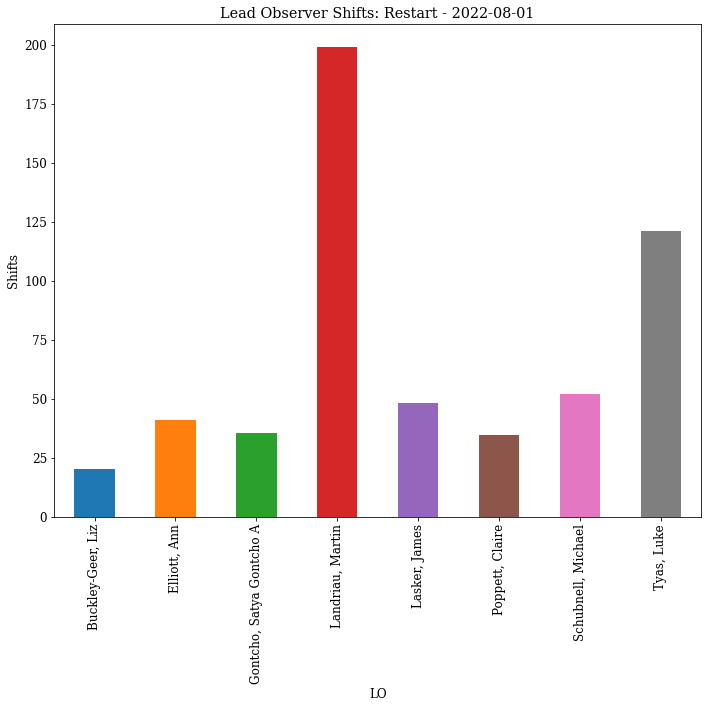

In [19]:
LO.plot.bar(x='print_name',y='total',color=plt.cm.tab10(np.arange(len(LO))),legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.xlabel("LO")
plt.title("Lead Observer Shifts: Restart - "+str(end_date))
plt.tight_layout()
plt.savefig("lo_post.png")

50
['Saclay' 'México RPG' 'LBNL' 'Andes' 'Michigan' 'KASI' 'México RPG'
 'UC Irvine' 'México RPG' 'Rochesterf' 'Rochesterf' 'Utah' 'Barcelona'
 'Swinburne' 'NOIRLab' 'Barcelona' 'Utah' 'Rochesterf' 'CPG-NAOC RPG'
 'Portsmouth' 'Saclay' 'Saclay' 'Florida' 'Shangai Jia Tong'
 'Shangai Jia Tong' 'Saint Andrews' 'UCL' 'CPG-NAOC RPG' 'Florida'
 'AMU-RPG' 'UCL' 'IFAE-UAB' 'Shangai Jia Tong' 'NOIRLab' 'Pittsburgh'
 'Shangai Jia Tong' 'Rochesterf' 'Durham' 'Harvard' 'OSU' 'CSIC' 'AMU-RPG'
 'NOIRLab' 'Arizona' 'OSU' 'Durham' 'México RPG' 'Shangai Jia Tong'
 'IFAE-UAB' 'Andes' 'Waterloo' 'Warwick' 'ECCI' 'Flatiron'
 'Shangai Jia Tong' 'IFAE-UAB' 'UC Irvine' 'SLAC' 'Shangai Jia Tong'
 'LPNHE' 'México RPG' 'Princeton' 'Royal Observatory, Edinburgh'
 'Michigan' 'Shangai Jia Tong' 'Florida' 'Queensland' 'Waterloo' 'NOIRLab'
 'Yale' 'Harvard' 'LBNL' 'U of Edinburgh' 'OSU' 'Harvard' 'UCSanta Cruz'
 'Perimeter' 'UCSanta Cruz' 'Carnegie' 'Shangai Jia Tong' 'Fermilab'
 'México RPG' 'IFAE-UAB' 'ICL' 'OSU'

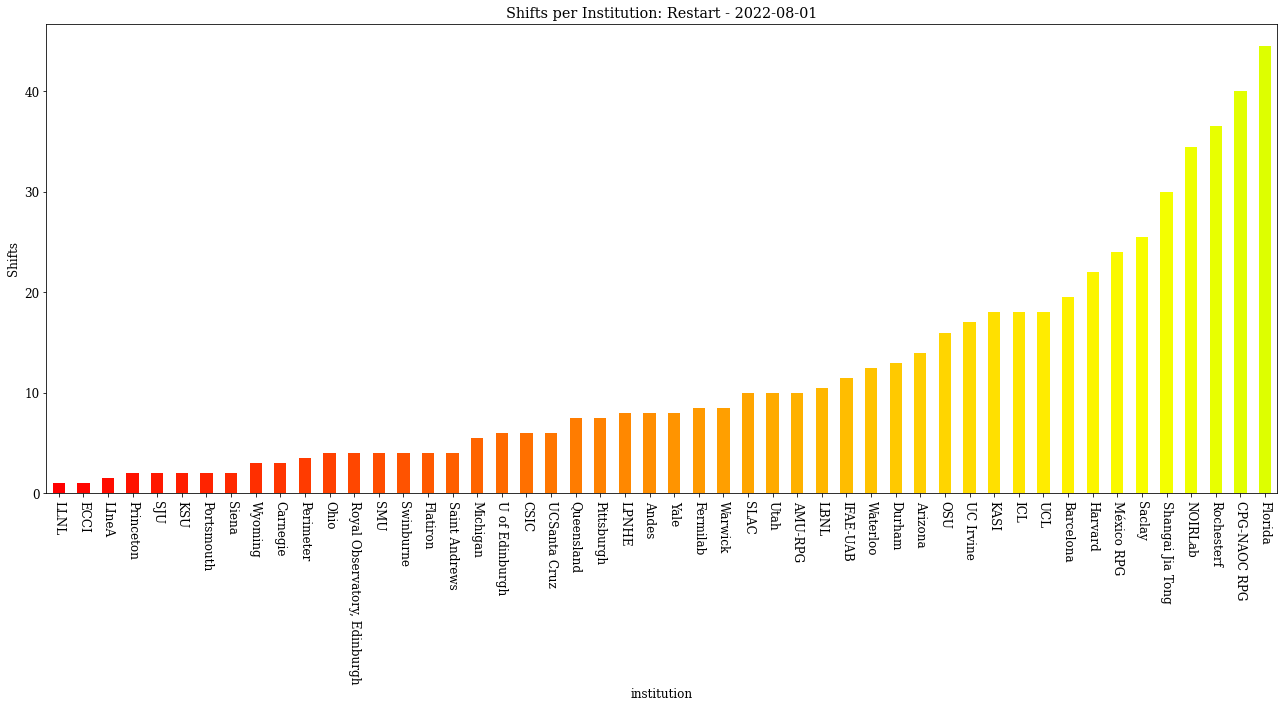

In [20]:
print(len(np.unique([f for f in list(NON_LO.institution) if f is not None])))
print(np.asarray(NON_LO['institution']))
NON_LO.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NON_LO))),rot=270,
                                                                figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution: Restart - "+str(end_date))
plt.tight_layout()
plt.savefig("inst_pre.png")

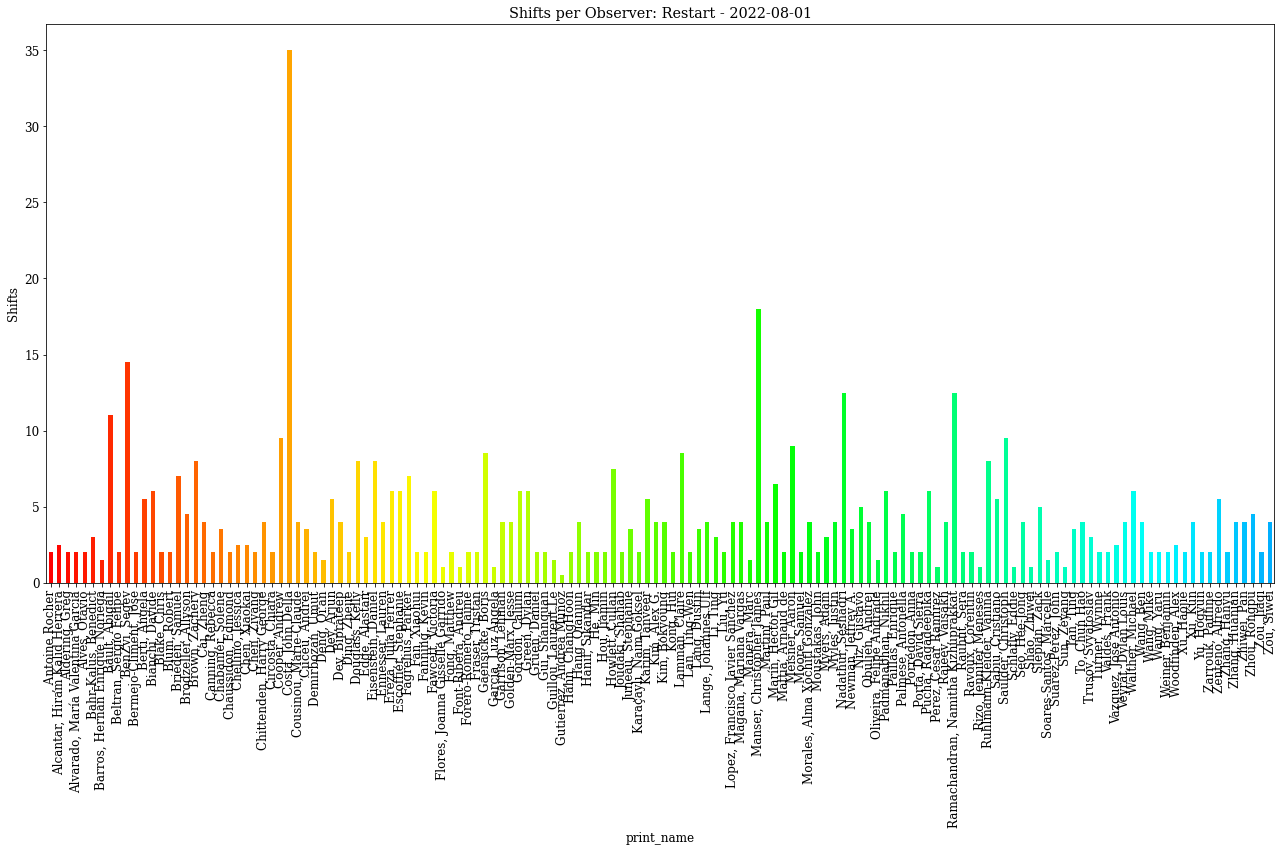

In [21]:
NON_LO.plot.bar(x='print_name',y='total',color=plt.cm.hsv(np.arange(len(NON_LO))),legend=None,figsize=(18,12))
plt.ylabel("Shifts")
plt.title("Shifts per Observer: Restart - "+str(end_date))
plt.tight_layout()
plt.savefig("obs_pre.png")

## Focal Plane and Calibrations

In [22]:
fp_df = obs_df[['date','cal','fp_setup','fp_oncall']]

In [23]:
fp_names = get_names(fp_df,['cal','fp_setup','fp_oncall'])

In [24]:
fp_df['Date'] = pd.to_datetime(fp_df['date'], format='%b. %d, %Y')

<ipython-input-24-399bfea5ce72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df['Date'] = pd.to_datetime(fp_df['date'], format='%b. %d, %Y')


In [25]:
fp_done = fp_df[fp_df.Date < '2021-03-15']

In [26]:
fp_ = {}
for name in fp_names:
    if name not in ['nan']:
        fp_[name] = {}
        for col in ['cal','fp_setup','fp_oncall']:
            d = fp_done.groupby(col).count().Date 
            try:
                fp_[name][col] =d[name]
            except:
                fp_[name][col] = 0

In [27]:
fp_ = pd.DataFrame.from_dict(fp_,orient='index')
fp_['name'] = fp_.index
fp_ = split_names(fp_)

Text(0.5, 1.0, 'Shifts for FP and Calibration Work Since Restart')

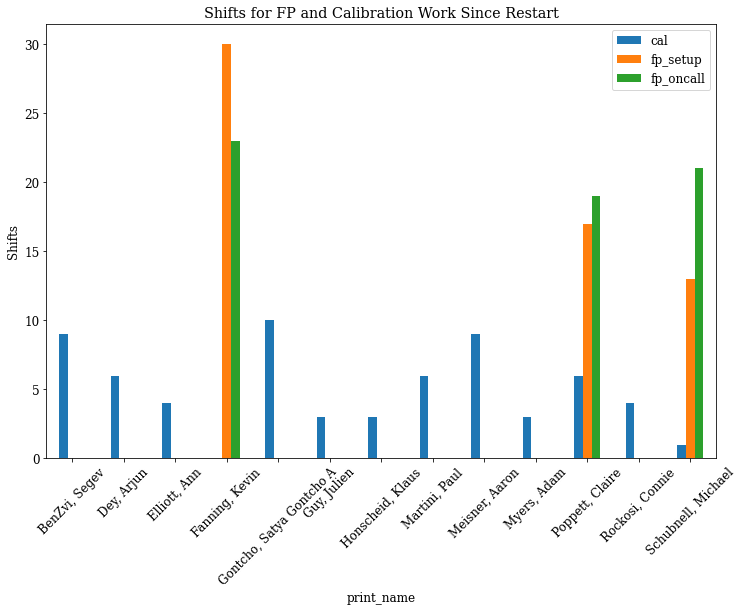

In [28]:
fp_.plot.bar(x='print_name',figsize=(12,8),rot=45)
plt.ylabel("Shifts")
plt.title("Shifts for FP and Calibration Work Since Restart")

## Previous Observations

In [29]:
old_df = pd.read_csv('old_obs.csv')
old_df = old_df[['Date','Lead Obs','Obs1','Obs2','Obs3']]

In [30]:
d = ['{} 2020'.format(d[:-2]) for d in list(old_df.Date)]
old_df['date'] = pd.to_datetime(d, format='%b %d %Y')

In [31]:
old_df.date

0     2020-10-14
1     2020-10-15
2     2020-10-16
3     2020-10-17
4     2020-10-18
         ...    
149   2020-03-11
150   2020-03-12
151   2020-03-13
152   2020-03-14
153   2020-03-15
Name: date, Length: 154, dtype: datetime64[ns]

In [32]:
old_df = old_df[old_df.date < '2020-03-16']

In [33]:
old_names=get_names(old_df,['Lead Obs','Obs1','Obs2','Obs3'])

In [34]:
d = {}
for col in old_df.columns[1:5]:
        d[col] = (old_df.groupby(col).count()).date.to_dict()

In [35]:
obs_old = []
for name in old_names:
    if name not in ['nan']:
        lo = 0
        os = 0
        for c in ['Lead Obs']:
            try:
                lo += d[c][name]
            except:
                lo += 0
        for c in ['Obs1','Obs2','Obs3']:
            try:
                os += d[c][name]
            except:
                os += 0
        try:
            i = list(trac[trac.name==name].institute)[0]
            ii = institutions[institutions.inst == i].short.values[0]
            total = lo+os
            obs_old.append([name,ii,lo,os,0,total])
        except:
            print('didnt work:', name)
            total = lo+os
            obs_old.append([name,None,lo,os,0,total])

In [36]:
OBS_old = pd.DataFrame(obs_old,columns=['name','institution','lo','os','dqs','total'])

In [37]:
LO_old, NON_LO_old = split_lo(OBS_old) 

In [38]:
LO_old

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
27,Liz Buckley-Geer,Fermilab,7,0,0,7,Buckley-Geer,Liz,"Buckley-Geer, Liz"
6,Ann Elliott,OSU,7,0,0,7,Elliott,Ann,"Elliott, Ann"
40,Satya Gontcho A Gontcho,LBNL,7,0,0,7,Gontcho,Satya Gontcho A,"Gontcho, Satya Gontcho A"
29,Martin Landriau,LBNL,15,0,0,15,Landriau,Martin,"Landriau, Martin"
14,Claire Poppett,LBNL,7,0,0,7,Poppett,Claire,"Poppett, Claire"
31,Michael Schubnell,Michigan,7,0,0,7,Schubnell,Michael,"Schubnell, Michael"
28,Luke Tyas,Durham,8,0,0,8,Tyas,Luke,"Tyas, Luke"


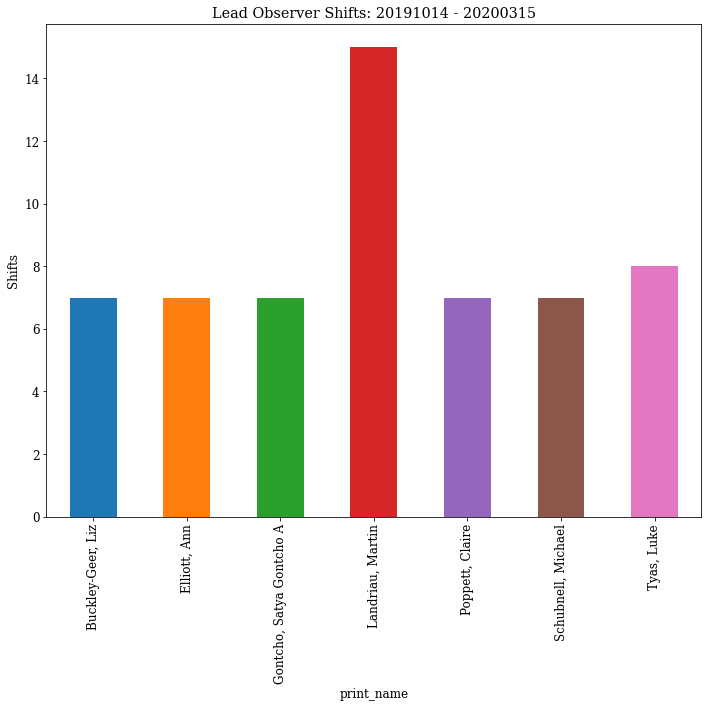

In [39]:
LO_old.plot.bar(x='print_name',y='total',color=plt.cm.tab10(np.arange(len(LO_old))),
                legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.title("Lead Observer Shifts: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("lo_pre.png")

38


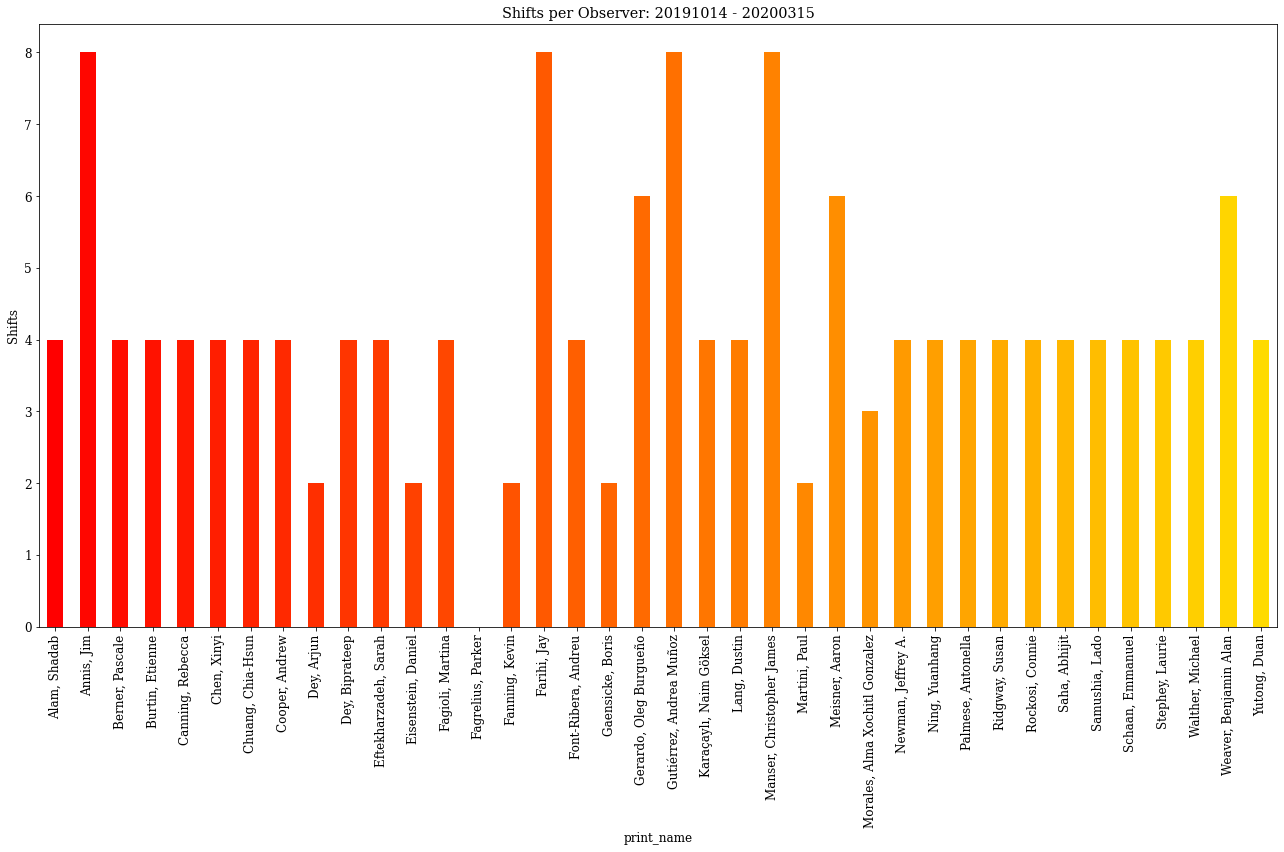

In [40]:
print(len(NON_LO_old))
NON_LO_old.plot.bar(x='print_name',y='os',color=plt.cm.hsv(np.arange(len(NON_LO_old))),
                    legend=None,figsize=(18,12))
plt.ylabel("Shifts")
plt.title("Shifts per Observer: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("obs_post.png")

23


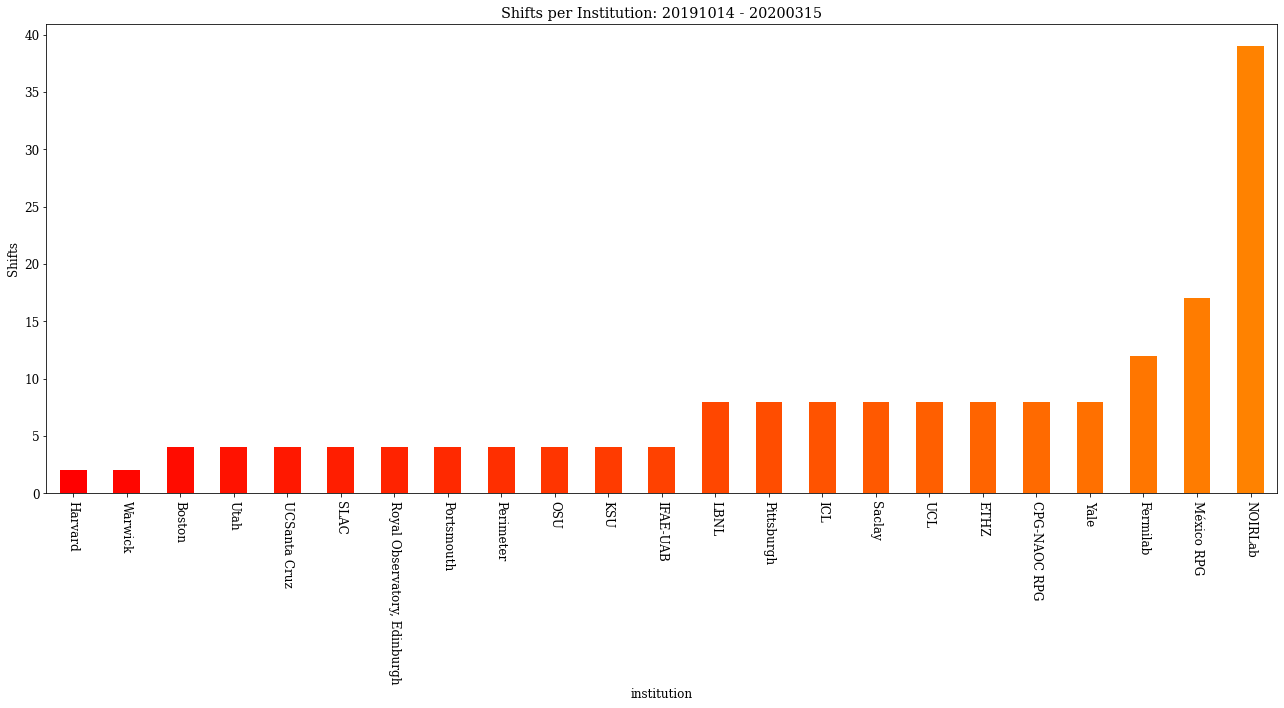

In [41]:
print(len(np.unique([f for f in list(NON_LO_old.institution) if f is not None])))
NON_LO_old.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NON_LO_old))),rot=270,
                                                                    figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution: 20191014 - 20200315")
plt.tight_layout()
plt.savefig("inst_post.png")

# Combined

In [42]:
OBS_full = pd.concat([OBS,OBS_old])

In [43]:
LO_full, NLO_full = split_lo(OBS_full)

In [44]:
LO_full.head()

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
27,Liz Buckley-Geer,Fermilab,7.0,0.0,0,7.0,Buckley-Geer,Liz,"Buckley-Geer, Liz"
88,Liz Buckley-Geer,Fermilab,11.0,9.0,0,20.0,Buckley-Geer,Liz,"Buckley-Geer, Liz"
6,Ann Elliott,OSU,7.0,0.0,0,7.0,Elliott,Ann,"Elliott, Ann"
15,Ann Elliott,OSU,40.0,1.0,0,41.0,Elliott,Ann,"Elliott, Ann"
40,Satya Gontcho A Gontcho,LBNL,7.0,0.0,0,7.0,Gontcho,Satya Gontcho A,"Gontcho, Satya Gontcho A"


In [45]:
NLO_full[NLO_full.institution == 'Portsmouth']

,name,institution,lo,os,dqs,total,last_name,first_name,print_name
38,Rebecca Canning,Portsmouth,0.0,4.0,0,4.0,Canning,Rebecca,"Canning, Rebecca"
113,Rebecca Canning,Portsmouth,0.0,2.0,0,2.0,Canning,Rebecca,"Canning, Rebecca"


In [46]:
institutions

,inst,short,East
0,AMU RPG - Institut National de Physique Nucléa...,AMU-RPG,TRUE
1,AMU RPG - Laboratoire d'Astrophysique de Marse...,AMU-RPG,TRUE
2,AMU RPG - Observatoire des Sciences de l'Unive...,AMU-RPG,TRUE
3,Argonne National Lab,Argonne,FALSE
4,Australian National University,ANU,TRUE
...,...,...,...
99,Yale University,Yale,FALSE
100,Yonsei University,Yonsei,TRUE
101,Yunnan University,Yunnan,TRUE
102,École Polytechnique Fédérale de Lausanne,EPFL,TRUE


In [47]:
LO_full.groupby('print_name').sum()

,lo,os,dqs,total
print_name,,,,
"Buckley-Geer, Liz",18.0,9.0,0,27.0
"Elliott, Ann",47.0,1.0,0,48.0
"Gontcho, Satya Gontcho A",30.5,12.0,0,42.5
"Landriau, Martin",206.5,7.5,0,214.0
"Lasker, James",43.0,5.0,0,48.0
"Poppett, Claire",25.0,16.5,0,41.5
"Schubnell, Michael",40.0,19.0,0,59.0
"Tyas, Luke",123.5,5.5,0,129.0


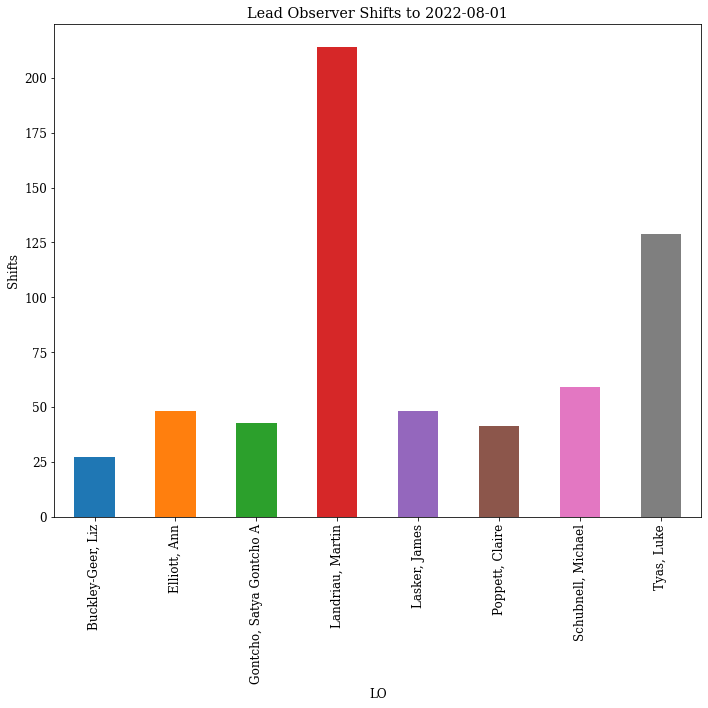

In [48]:
LO_full.groupby('print_name').sum().total.plot.bar(color=plt.cm.tab10(np.arange(len(LO_full))),
                                                   legend=None,figsize=(10,10))
plt.ylabel("Shifts")
plt.xlabel("LO")
plt.title("Lead Observer Shifts to "+str(end_date))
plt.tight_layout()
plt.savefig("lo_total.png")

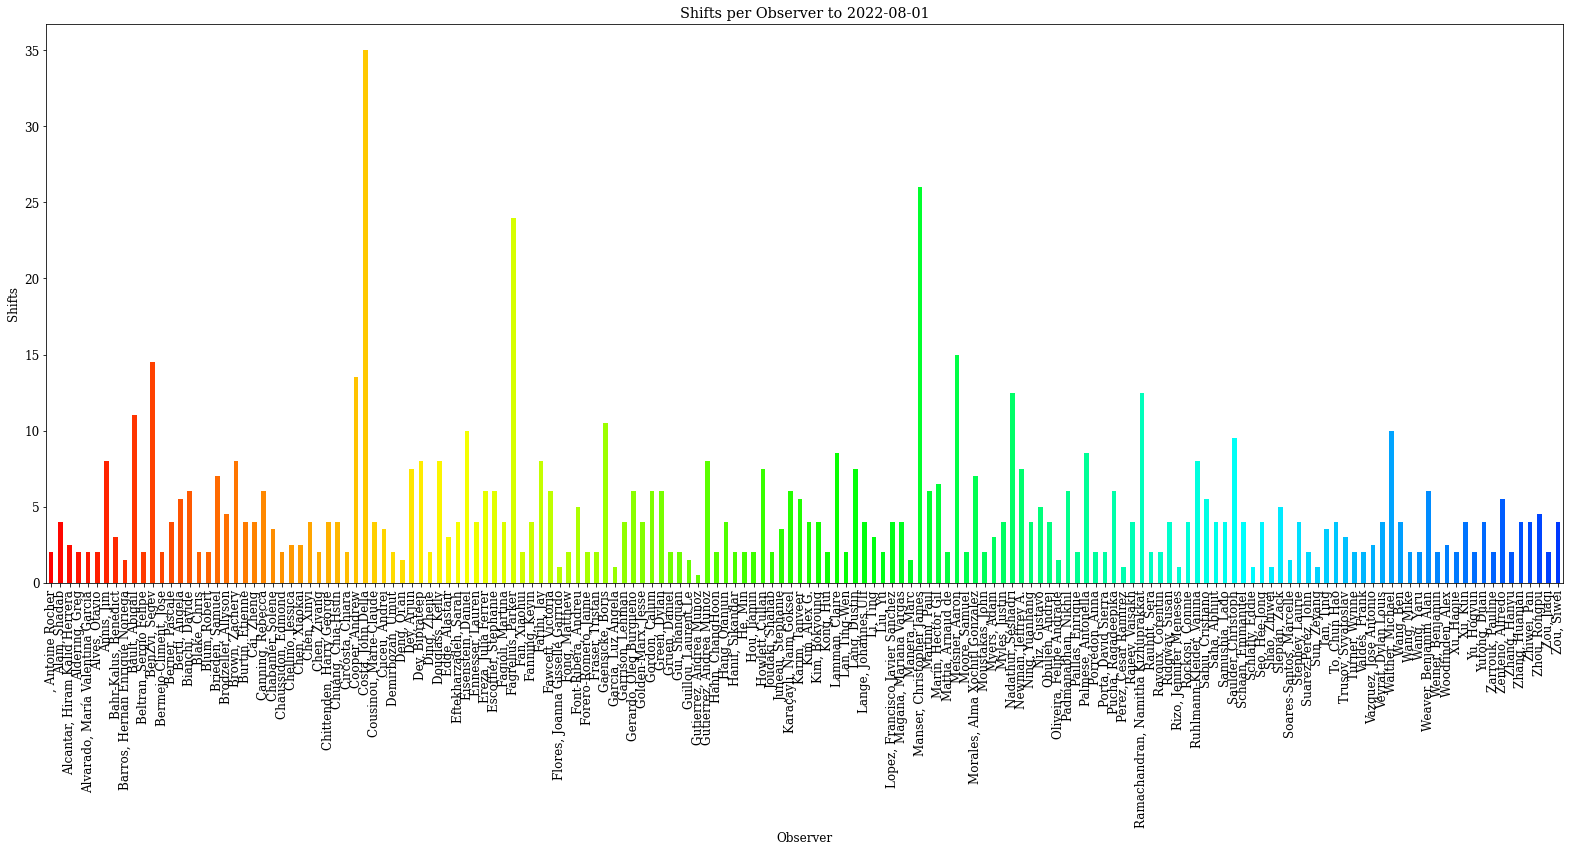

In [49]:
NLO_full.groupby('print_name').sum().total.plot.bar(color=plt.cm.hsv(np.arange(len(NLO_full))),legend=None,
                                                    figsize=(22,12))
plt.ylabel("Shifts")
plt.xlabel("Observer")
plt.title("Shifts per Observer to "+str(end_date))
plt.tight_layout()
plt.savefig("obs_total.png")
NLO_full.to_csv('all_observers.csv')

In [50]:
s = NLO_full.groupby('print_name').sum().total


In [51]:
len(s)
s.to_csv('test.csv')

In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s)

print_name
, Antoine Rocher                       2.0
Alam, Shadab                           4.0
Alcantar, Hiram Kalid Herrera          2.5
Aldering, Greg                         2.0
Alvarado, María Valentina García       2.0
Alves, Otávio                          2.0
Annis, Jim                             8.0
Bahr-Kalus, Benedict                   3.0
Barros, Hernan Enrique Noriega         1.5
Bault, Abigail                        11.0
Beltran, Sergio Felipe                 2.0
BenZvi, Segev                         14.5
Bermejo-Climent, Jose                  2.0
Berner, Pascale                        4.0
Berti, Angela                          5.5
Bianchi, Davide                        6.0
Blake, Chris                           2.0
Blum, Robert                           2.0
Brieden, Samuel                        7.0
Brodzeller, Allyson                    4.5
Brown, Zachery                         8.0
Burtin, Etienne                        4.0
Cai, Zheng                             4.0


52


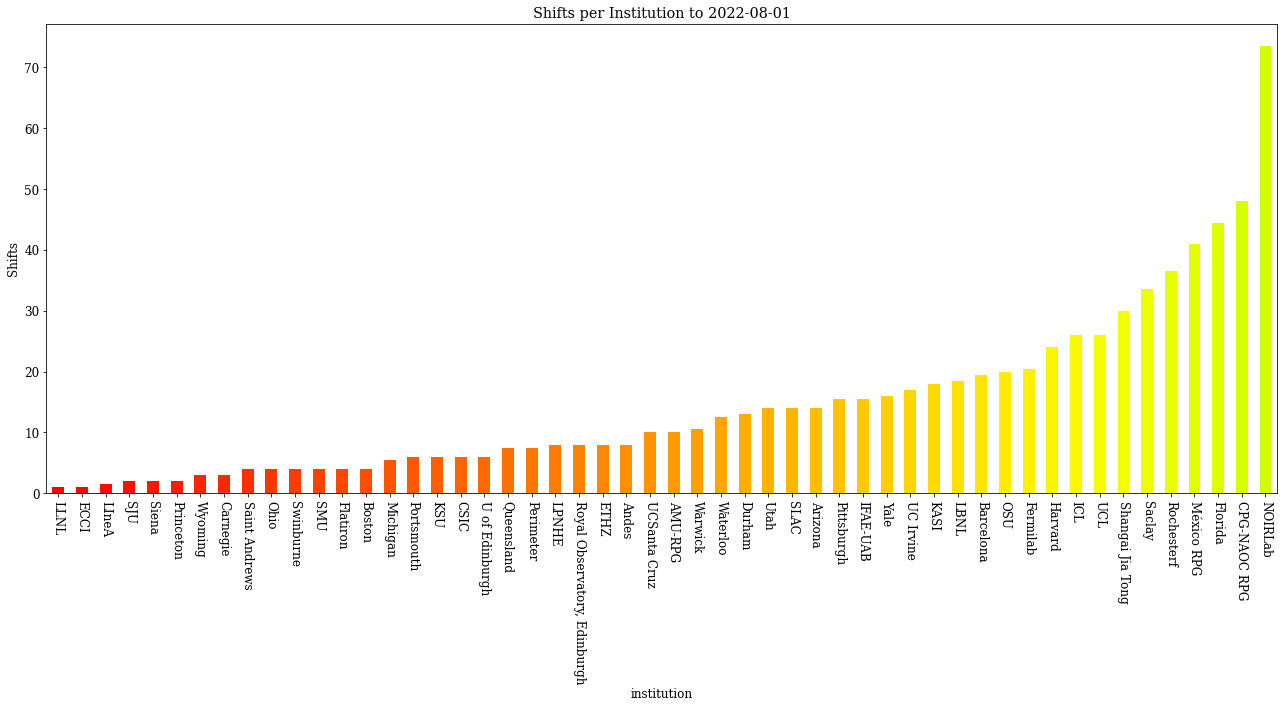

In [53]:
print(len(np.unique([f for f in list(NLO_full.institution) if f is not None])))
NLO_full.groupby('institution').sum().total.sort_values().plot.bar(x='institution',y='total',legend=None,
                                                                   color=plt.cm.hsv(np.arange(len(NLO_full))),rot=270,
                                                                  figsize=(18,10))
plt.ylabel("Shifts")
plt.title("Shifts per Institution to "+str(end_date))
plt.tight_layout()
plt.savefig("inst_total.png")

In [54]:
OBS_full.groupby('institution').sum().to_csv('inst_stats.csv')

In [55]:
len(OBS_full.groupby('institution'))

52

## Institions that have not observed

In [56]:
no_obs = [inst for inst in institutions if inst not in list(NON_LO.institution)]

In [57]:
no_obs_old = [inst for inst in institutions if inst not in list(NON_LO_old.institution)]

In [58]:
never_obs = []
not_since_return = []
for inst in list(institutions.short):
    if inst not in list(NON_LO_old.institution):
        if inst not in list(NON_LO.institution):
            if inst not in list(LO_old.institution):
                
                never_obs.append(inst)
    else:
        if inst not in list(NON_LO.institution):
            if inst not in list(LO.institution):
                not_since_return.append(inst)

In [59]:
pd.DataFrame(never_obs).to_csv('inst_never_obs.csv')

In [579]:
pd.DataFrame(not_since_return)

,0
0,Boston
1,ETHZ
